<a href="https://colab.research.google.com/github/a-emreusta/success-of-ai-writers/blob/main/dataPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df_train = pd.read_csv("/content/drive/MyDrive/Success of AI Writers/DATA/snli_1.0_train.csv")
df_val=pd.read_csv("/content/drive/MyDrive/Success of AI Writers/DATA/snli_1.0_dev.csv")

In [73]:
df_train.shape

(550152, 3)

In [74]:
df_val.shape

(10000, 3)

In [75]:
df_train.head()

,similarity,sentence1,sentence2
0,neutral,A person on a horse jumps over a broken down a...,A person is training his horse for a competition.
1,contradiction,A person on a horse jumps over a broken down a...,"A person is at a diner, ordering an omelette."
2,entailment,A person on a horse jumps over a broken down a...,"A person is outdoors, on a horse."
3,neutral,Children smiling and waving at camera,They are smiling at their parents
4,entailment,Children smiling and waving at camera,There are children present


In [76]:
df_val.head()

,similarity,sentence1,sentence2
0,neutral,Two women are embracing while holding to go pa...,The sisters are hugging goodbye while holding ...
1,entailment,Two women are embracing while holding to go pa...,Two woman are holding packages.
2,contradiction,Two women are embracing while holding to go pa...,The men are fighting outside a deli.
3,entailment,"Two young children in blue jerseys, one with t...",Two kids in numbered jerseys wash their hands.
4,neutral,"Two young children in blue jerseys, one with t...",Two kids at a ballgame wash their hands.


In [77]:
print(f"Sentence1: {df_train.loc[1, 'sentence1']}")
print(f"Sentence2: {df_train.loc[1, 'sentence2']}")
print(f"Similarity: {df_train.loc[1, 'similarity']}")

Sentence1: A person on a horse jumps over a broken down airplane.
Sentence2: A person is at a diner, ordering an omelette.
Similarity: contradiction


In [78]:
print("Number of missing values for train data")
print(df_train.isnull().sum())

Number of missing values for train data
similarity    0
sentence1     0
sentence2     6
dtype: int64


In [79]:
df_train.dropna(axis=0,inplace=True)

In [80]:
print("Number of missing values for train data")
print(df_train.isnull().sum())

Number of missing values for train data
similarity    0
sentence1     0
sentence2     0
dtype: int64


In [82]:
print("Number of missing values for validation data")
print(df_val.isnull().sum())

Number of missing values for validation data
similarity    0
sentence1     0
sentence2     0
dtype: int64


In [81]:
df_train.describe()

,similarity,sentence1,sentence2
count,550146,550146,550146
unique,4,150772,480122
top,entailment,A dog in a field.,A man is sleeping.
freq,183414,33,335


In [83]:
df_val.describe()

,similarity,sentence1,sentence2
count,10000,10000,10000
unique,4,3320,9819
top,entailment,An Asian man attempting to repair a green bicy...,There are multiple people present.
freq,3329,6,6


In [84]:
print("Train Target Distribution")
print(df_train.similarity.value_counts())

Train Target Distribution
entailment       183414
contradiction    183185
neutral          182762
-                   785
Name: similarity, dtype: int64


In [85]:
print("Validation Target Distribution")
print(df_val.similarity.value_counts())

Validation Target Distribution
entailment       3329
contradiction    3278
neutral          3235
-                 158
Name: similarity, dtype: int64


In [86]:
df_train=df_train[df_train.similarity!="-"].reset_index()
df_val=df_val[df_val.similarity!="-"].reset_index()

In [130]:
print("Distribution of our train targets")
print(df_train.similarity.value_counts())

Distribution of our train targets
entailment       183414
contradiction    183185
neutral          182762
Name: similarity, dtype: int64


In [131]:
print("Distribution of our validation targets")
print(df_val.similarity.value_counts())

Distribution of our validation targets
entailment       3329
contradiction    3278
neutral          3235
Name: similarity, dtype: int64


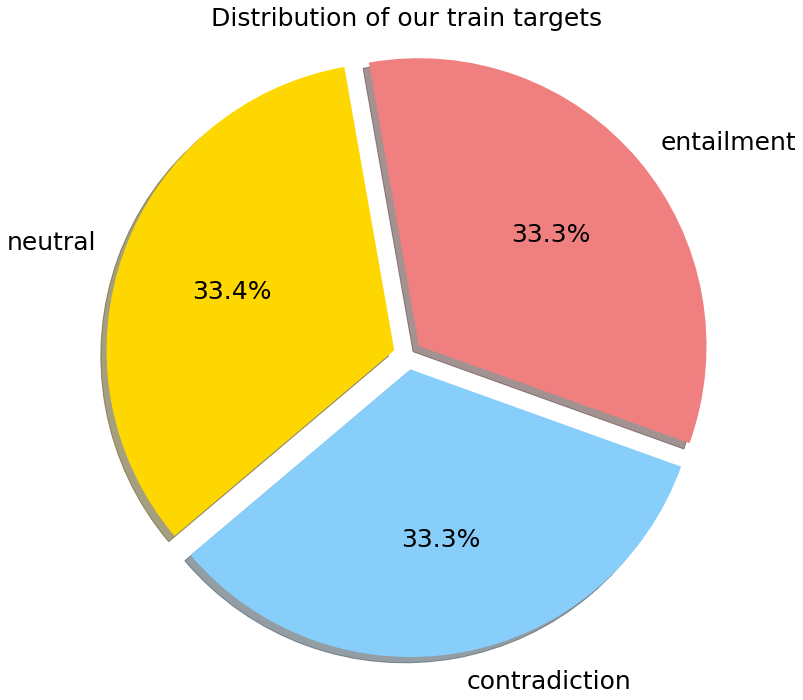

In [132]:
similarity=[df_train.similarity.unique()[0],df_train.similarity.unique()[1],df_train.similarity.unique()[2]]
counts=[df_train.similarity.value_counts().entailment,df_train.similarity.value_counts().contradiction,df_train.similarity.value_counts().neutral]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.05, 0.05, 0.05) 
fig = plt.figure(figsize =(12,12))
plt.pie(counts, explode=explode, labels=similarity, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=100, textprops={'fontsize': 25,'color':"black"})
plt.title("Distribution of our train targets",  fontsize=25)
plt.axis('equal')
plt.show()

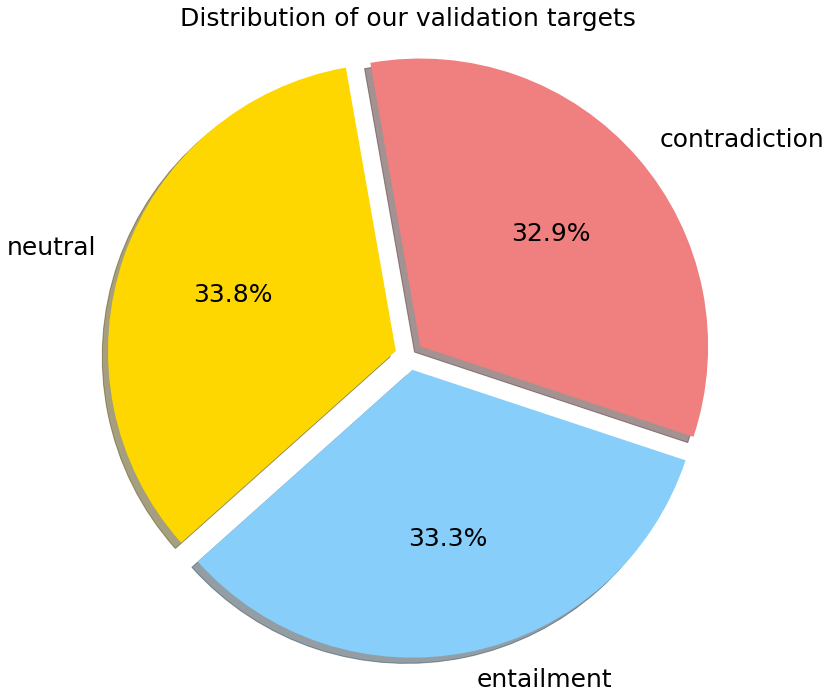

In [134]:
similarity=[df_val.similarity.unique()[0],df_val.similarity.unique()[1],df_val.similarity.unique()[2]]
counts=[df_val.similarity.value_counts().entailment,df_val.similarity.value_counts().contradiction,df_val.similarity.value_counts().neutral]
colors = ['gold', 'lightskyblue', 'lightcoral']
explode = (0.05, 0.05, 0.05) 
fig = plt.figure(figsize =(12,12))
plt.pie(counts, explode=explode, labels=similarity, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=100, textprops={'fontsize': 25,'color':"black"})
plt.title("Distribution of our validation targets",  fontsize=25)
plt.axis('equal')
plt.show()

'neutral'